# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Desarrollo

### 1. Análisis exploratorio inicial
Visualizar las primeras filas.
Realizar un resumen de 5 números.
Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
Identificar las variables de entrada y de salida del problema.
Variables de entrada:
Realizar los siguientes análisis por tipo de variable.
Numéricas:
Obtener conclusiones acerca de la distribución de los datos.
Categóricas
Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
Variables de salida:
¿Están balanceadas las clases?
¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Defino una función que me asegura si puedo aplicar CCA

In [233]:
def porcentaje_nulos(columna):
    m = columna.shape[0]
    num_nul = columna.isnull().sum()
    porc_nul = (num_nul * 100)/m
    return porc_nul
    

In [234]:
def cca(columna):
    m = columna.shape[0]
    porc_minimo = (5*m)/100
    num_nul = columna.isnull().sum()
    if num_nul < porc_minimo:
        return True
    else:
        return False

In [235]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [236]:
def col_cca_nocca(columnas):    
    cca_columns = []
    no_cca_columns = []
    for i in columnas:
        if cca(df[i]):
            cca_columns.append(i)
        else:
            no_cca_columns.append(i)
    return cca_columns, no_cca_columns

In [237]:
def mayor_35(columnas):
    m = columnas.shape[0]
    porc_minimo = (35*m)/100
    num_nul = columnas.isnull().sum()
    if num_nul > porc_minimo:
        return True
    else:
        return False
    

In [238]:
def col_mayor_35(columnas):    
    col_mayor_35 = []
    no_col_mayor_35 = []
    for i in columnas:
        if mayor_35(df[i]):
            col_mayor_35.append(i)
        else:
            no_col_mayor_35.append(i)
    return col_mayor_35, no_col_mayor_35

In [239]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [240]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [241]:
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

### Vemos como van los datos nulos

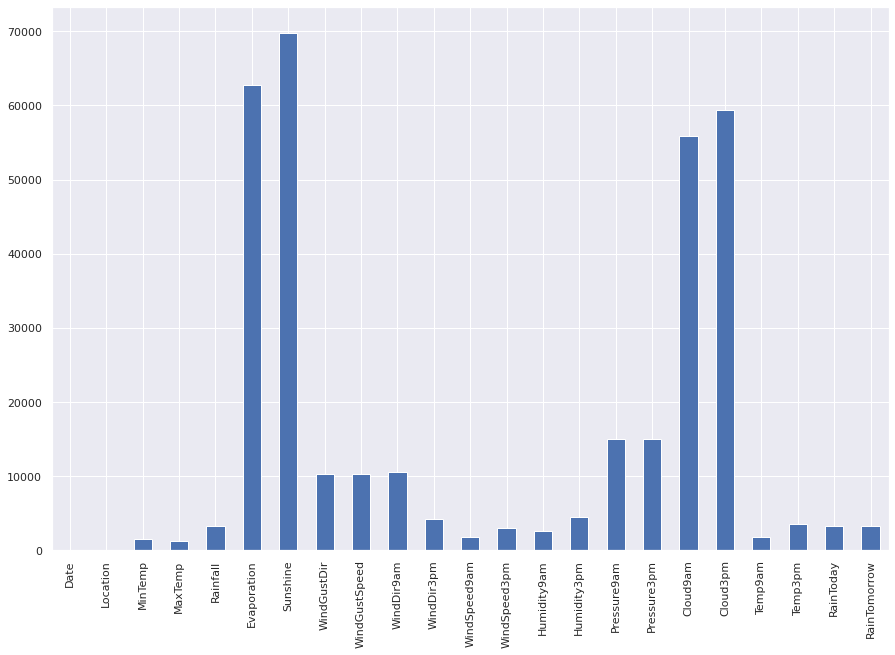

In [242]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

In [243]:
columnas = np.array(df.columns)
col_mayor_35, no_col_mayor_35 = col_mayor_35(columnas)
print(col_mayor_35)
print(no_col_mayor_35)

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [244]:
# Elimino los que tengan mas del 50% de datos faltantes
df = df.drop(columns=col_mayor_35,axis=1)

In [245]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


<AxesSubplot:>

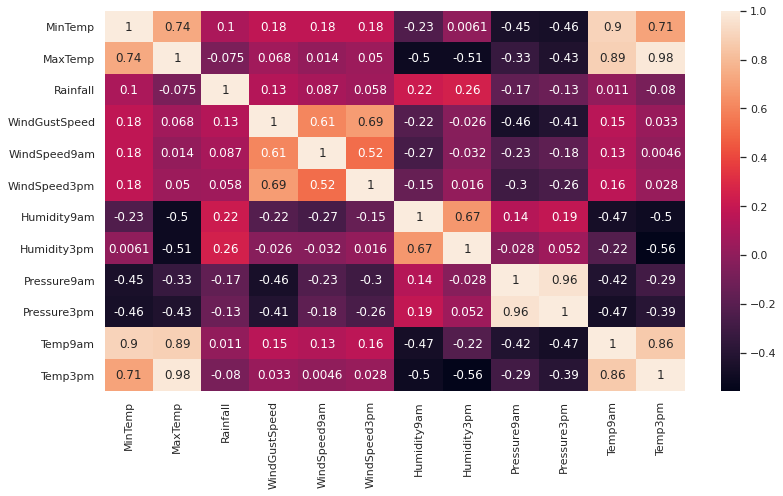

In [246]:
plt.figure(figsize=(13,7))

sns.heatmap(df.corr(),annot=True)

In [247]:
# Debido a la alta correlación eliminamos Temp3pm y Temp9pm
df.drop(['Temp3pm','Temp9am'],axis=1,inplace=True)


In [248]:
#Location y date no serán usados por lo que serán eliminados
df.drop(['Date','Location'],axis=1,inplace=True)

In [249]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

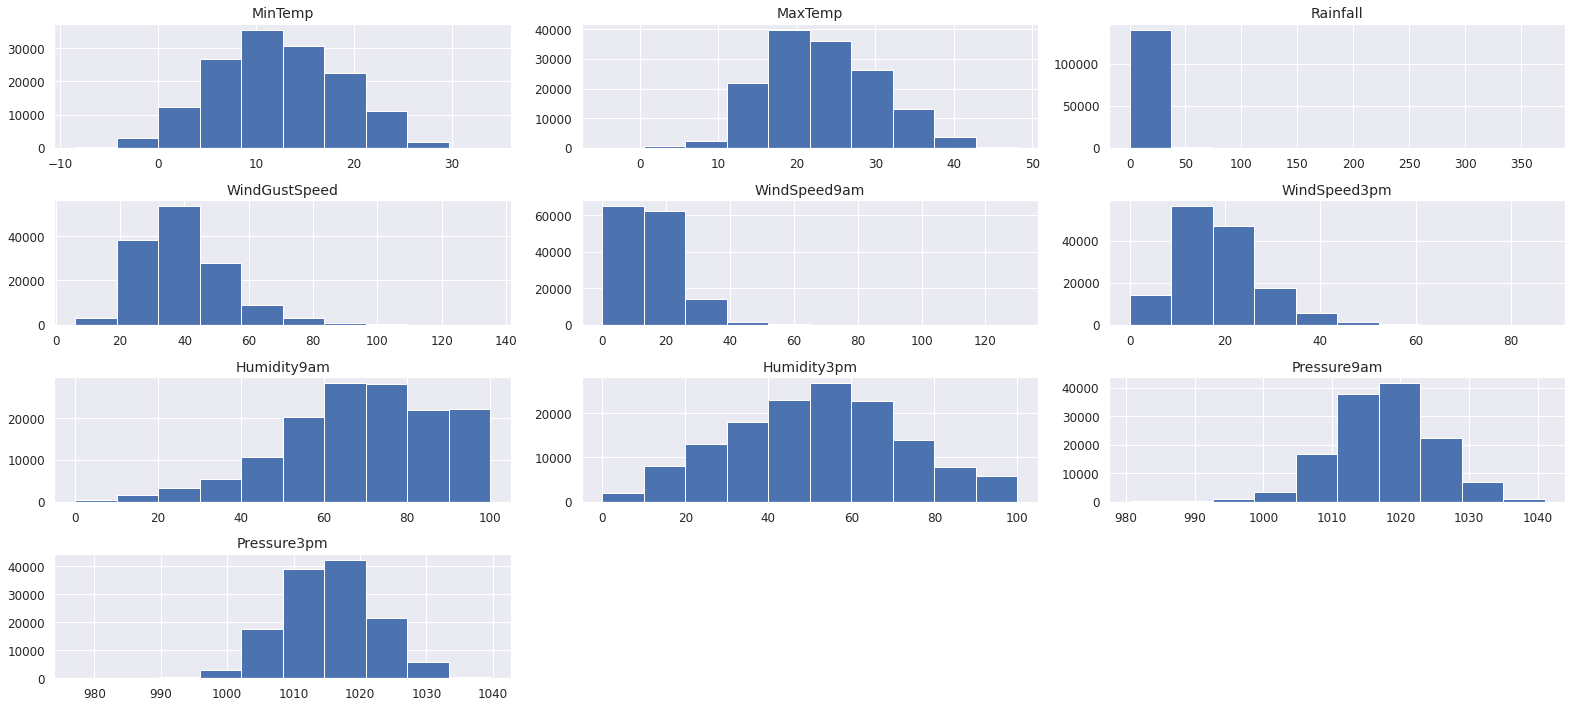

In [250]:
display_dataset_distributions(df)

# Limpieza y preparación de datos / ingeniería de features

In [251]:
columnas = np.array(df.columns)

In [252]:
columnas

array(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday', 'RainTomorrow'], dtype=object)

In [253]:
cca_columns, no_cca_columns = col_cca_nocca(columnas)

In [254]:
cca_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'RainToday',
 'RainTomorrow']

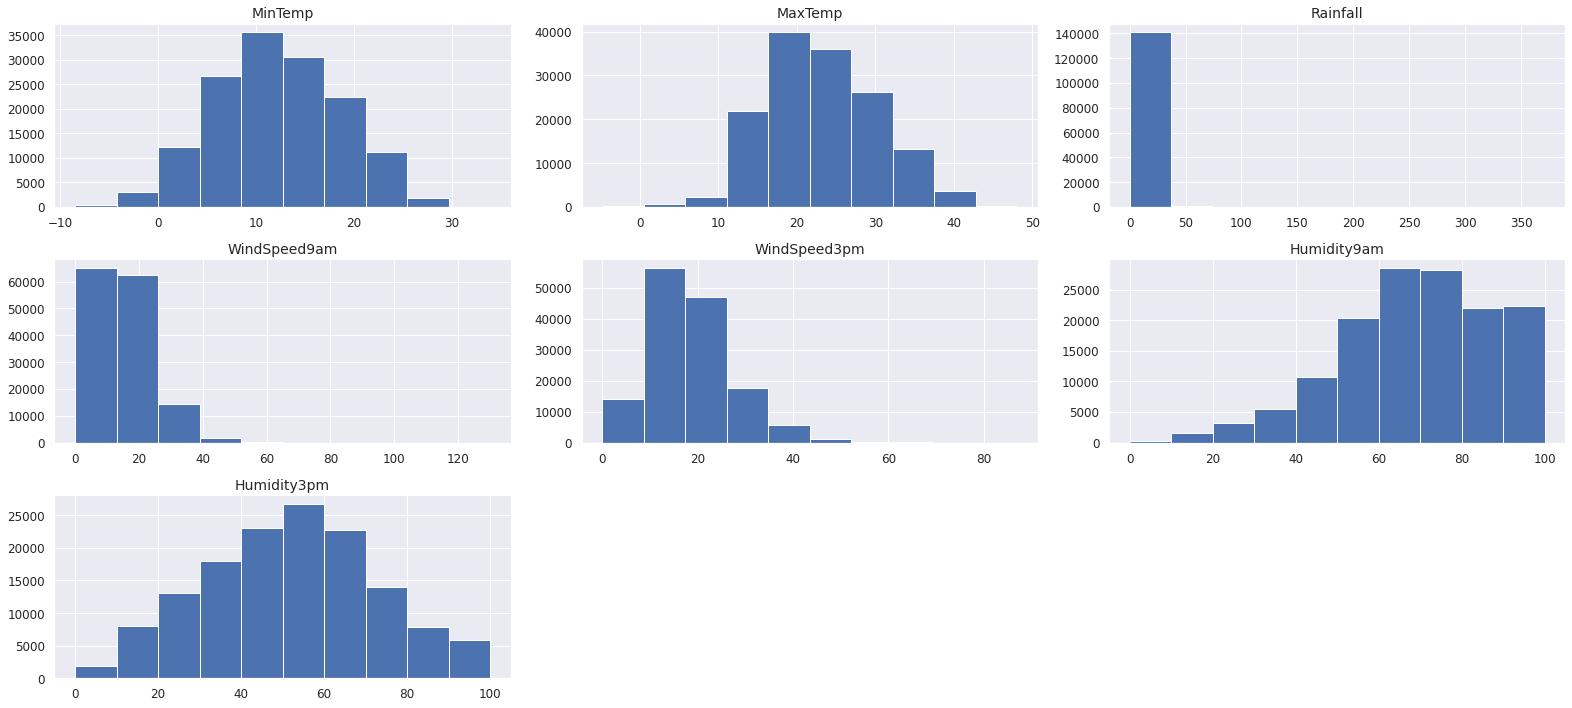

In [255]:
display_dataset_distributions(df[cca_columns])

<AxesSubplot:>

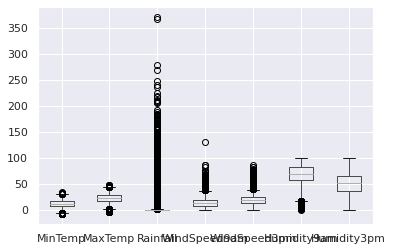

In [256]:
df[cca_columns].boxplot()

In [257]:
df['MinTemp'].fillna((df['MinTemp'].mean()), inplace=True)

In [258]:
df['MaxTemp'].fillna((df['MaxTemp'].mean()), inplace=True)

In [259]:
df['WindSpeed9am'].fillna((df['MaxTemp'].median()), inplace=True)

In [260]:
df['WindSpeed3pm'].fillna((df['MaxTemp'].median()), inplace=True)

In [261]:
df['Humidity9am'].fillna((df['Humidity9am'].median()), inplace=True)

In [262]:
df['Humidity3pm'].fillna((df['Humidity9am'].mean()), inplace=True)

In [263]:
df['Rainfall'].fillna((df['Rainfall'].mean()), inplace=True)

### Hacemos tratamiento para categorical data 

In [264]:
df[cca_columns].columns[df[cca_columns].isna().any()].tolist()

['WindDir3pm', 'RainToday', 'RainTomorrow']

In [265]:
#eliminamos los datos
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,No,No
1,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,No,No
2,12.9,25.700000,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,No,No
3,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,No,No
4,17.5,32.300000,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,No,No
145456,3.6,25.300000,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,No,No
145457,5.4,26.900000,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,No,No
145458,7.8,27.000000,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,No,No


### Tratamiento en columnas que no se puede hacer CCA

In [266]:
no_cca_columns

['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'Pressure9am', 'Pressure3pm']

#### Tratamiento en las columnas numericas

In [267]:
numerical_col = df[no_cca_columns]._get_numeric_data().columns

In [268]:
numerical_col

Index(['WindGustSpeed', 'Pressure9am', 'Pressure3pm'], dtype='object')

array([[<AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>, <AxesSubplot:>]],
      dtype=object)

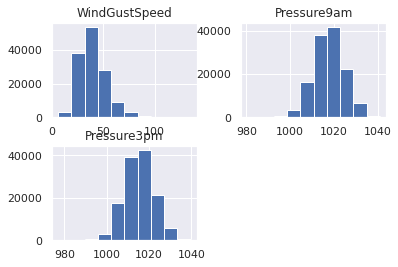

In [269]:
df[numerical_col].hist()

<AxesSubplot:>

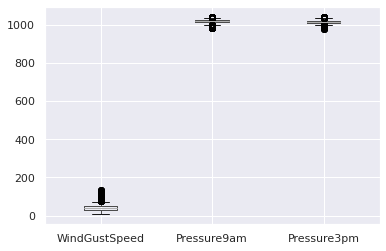

In [270]:
df[numerical_col].boxplot()

#### Imputación por mediana

In [271]:
df["WindGustSpeed"].isnull().sum()

10263

In [272]:
# Reemplazar valores por la mediana por que tiene oblicuidad:
df["WindGustSpeed"].fillna(value=df["WindGustSpeed"].median(), inplace=True)
print(df["WindGustSpeed"].isnull().sum())

0


#### Imputación por media

In [273]:
# Reemplazando con mean
df["Pressure9am"].isnull().sum()

15065

In [274]:
df["Pressure9am"].fillna(value=df["Pressure9am"].mean(), inplace=True)
print(df["Pressure9am"].isnull().sum())

0


In [275]:
# Reemplazando con mean
df["Pressure3pm"].isnull().sum()

15028

In [276]:
df["Pressure3pm"].fillna(value=df["Pressure3pm"].mean(), inplace=True)
print(df["Pressure3pm"].isnull().sum())

0


#### Tratamiento en todas las columnas continuas

In [277]:
#comprobamos que solo quedan nulos en las categoricas
df.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [278]:
cat_variables = df[["WindGustDir","WindDir9am","WindDir3pm","RainToday"]]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [279]:
df = df.drop(["WindGustDir","WindDir9am","WindDir3pm","RainToday"], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

y = df["RainTomorrow"]


In [287]:

df = df.drop(["RainTomorrow"], axis=1)

In [288]:
df.RainTomorrow

AttributeError: 'DataFrame' object has no attribute 'RainTomorrow'

In [289]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [291]:
df.isna().any()

MinTemp            False
MaxTemp            False
Rainfall           False
WindGustSpeed      False
WindSpeed9am       False
WindSpeed3pm       False
Humidity9am        False
Humidity3pm        False
Pressure9am        False
Pressure3pm        False
WindGustDir_ENE    False
WindGustDir_ESE    False
WindGustDir_N      False
WindGustDir_NE     False
WindGustDir_NNE    False
WindGustDir_NNW    False
WindGustDir_NW     False
WindGustDir_S      False
WindGustDir_SE     False
WindGustDir_SSE    False
WindGustDir_SSW    False
WindGustDir_SW     False
WindGustDir_W      False
WindGustDir_WNW    False
WindGustDir_WSW    False
WindDir9am_ENE     False
WindDir9am_ESE     False
WindDir9am_N       False
WindDir9am_NE      False
WindDir9am_NNE     False
WindDir9am_NNW     False
WindDir9am_NW      False
WindDir9am_S       False
WindDir9am_SE      False
WindDir9am_SSE     False
WindDir9am_SSW     False
WindDir9am_SW      False
WindDir9am_W       False
WindDir9am_WNW     False
WindDir9am_WSW     False


In [292]:
df.isna().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
WindGustDir_ENE    0
WindGustDir_ESE    0
WindGustDir_N      0
WindGustDir_NE     0
WindGustDir_NNE    0
WindGustDir_NNW    0
WindGustDir_NW     0
WindGustDir_S      0
WindGustDir_SE     0
WindGustDir_SSE    0
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
WindDir9am_ENE     0
WindDir9am_ESE     0
WindDir9am_N       0
WindDir9am_NE      0
WindDir9am_NNE     0
WindDir9am_NNW     0
WindDir9am_NW      0
WindDir9am_S       0
WindDir9am_SE      0
WindDir9am_SSE     0
WindDir9am_SSW     0
WindDir9am_SW      0
WindDir9am_W       0
WindDir9am_WNW     0
WindDir9am_WSW     0
WindDir3pm_ENE     0
WindDir3pm_ESE     0
WindDir3pm_N       0
WindDir3pm_NE      0
WindDir3pm_NNE     0
WindDir3pm_NNW     0
WindDir3pm_NW      0
WindDir3pm_S 